In [1]:
!pip install ultralytics opencv-python-headless matplotlib seaborn pandas torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
import torch
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Check GPU availability
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

# Ensure Colab is using T4 GPU
gpu_info = !nvidia-smi --query-gpu=name --format=csv,noheader
if 'T4' not in gpu_info[0]:
    print("Warning: You are not using a T4 GPU. Consider switching runtime type.")

Using device: cuda


In [8]:
# Mount Google Drive (if dataset is stored there)
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Set dataset path (update this based on your dataset location)
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Dataset'

In [10]:
# Define paths for train, validation, and test sets
image_dirs = {
    "train": os.path.join(dataset_path, 'images', 'train'),
    "valid": os.path.join(dataset_path, 'images', 'val'),
    "test": os.path.join(dataset_path, 'images', 'test')
}
label_dirs = {
    "train": os.path.join(dataset_path, 'labels', 'train'),
    "valid": os.path.join(dataset_path, 'labels', 'val'),
    "test": os.path.join(dataset_path, 'labels', 'test')
}


In [11]:
# Count images and annotations
for split in ["train", "valid", "test"]:
    num_images = len(os.listdir(image_dirs[split]))
    num_annotations = len(os.listdir(label_dirs[split]))
    print(f'{split.capitalize()} - Images: {num_images}, Annotations: {num_annotations}')


Train - Images: 1984, Annotations: 1984
Valid - Images: 189, Annotations: 189
Test - Images: 95, Annotations: 95


In [12]:
# Load YOLOv8 model
model = YOLO('yolov8s.pt')  # Use 'yolov8n.pt' for a smaller model


100%|██████████| 21.5M/21.5M [00:00<00:00, 261MB/s]


In [13]:
model.train(
    data=f"{dataset_path}/data.yaml",  # Path to the dataset YAML file
    epochs=100,  # Adjust based on your needs
    batch=16,
    imgsz=640,
    device=device,
    workers=2,
    name='yolov8_medical_waste'
)

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Colab Notebooks/Dataset/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=2, project=None, name=yolov8_medical_waste, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False

100%|██████████| 755k/755k [00:00<00:00, 25.0MB/s]


Overriding model.yaml nc=80 with nc=12

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 97.3MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Colab Notebooks/Dataset/labels/train.cache... 1984 images, 49 backgrounds, 0 corrupt: 100%|██████████| 1984/1984 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Colab Notebooks/Dataset/labels/val... 189 images, 9 backgrounds, 0 corrupt: 100%|██████████| 189/189 [01:49<00:00,  1.73it/s]

val: New cache created: /content/drive/MyDrive/Colab Notebooks/Dataset/labels/val.cache


Plotting labels to runs/detect/yolov8_medical_waste/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8_medical_waste
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.74G      1.367      3.195       1.64        107        640: 100%|██████████| 124/124 [07:40<00:00,  3.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.00s/it]

                   all        189        519      0.511      0.294      0.257      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.53G      1.305      2.185      1.537         55        640: 100%|██████████| 124/124 [00:54<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.32it/s]

                   all        189        519       0.46       0.31      0.255      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.54G      1.343      2.144      1.562         48        640: 100%|██████████| 124/124 [00:53<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.43it/s]

                   all        189        519      0.552      0.231      0.238      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.54G      1.317      1.988      1.534         65        640: 100%|██████████| 124/124 [00:53<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.62it/s]

                   all        189        519      0.664      0.232      0.285      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.54G      1.251      1.863      1.485        101        640: 100%|██████████| 124/124 [00:54<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]

                   all        189        519      0.598      0.287      0.325      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.54G      1.225      1.773      1.466         62        640: 100%|██████████| 124/124 [00:55<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.90it/s]

                   all        189        519      0.482      0.356      0.331      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.54G      1.189      1.778      1.454         92        640: 100%|██████████| 124/124 [00:54<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]

                   all        189        519      0.651      0.358      0.372      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.54G      1.149      1.649      1.421         89        640: 100%|██████████| 124/124 [00:54<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.90it/s]

                   all        189        519      0.621      0.306      0.343      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.57G      1.143      1.579      1.406        106        640: 100%|██████████| 124/124 [00:54<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.88it/s]

                   all        189        519      0.747      0.368      0.434      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.61G      1.098      1.526      1.374         69        640: 100%|██████████| 124/124 [00:55<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        189        519      0.569      0.422       0.41       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.64G      1.062       1.46      1.363         73        640: 100%|██████████| 124/124 [00:55<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all        189        519      0.751      0.412      0.458      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.64G      1.056      1.417      1.338        123        640: 100%|██████████| 124/124 [00:55<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]

                   all        189        519      0.726      0.419      0.492      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.64G      1.013      1.358      1.324         77        640: 100%|██████████| 124/124 [00:54<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.88it/s]

                   all        189        519      0.713      0.482      0.485      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.64G      1.025       1.34       1.32         50        640: 100%|██████████| 124/124 [00:54<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.84it/s]

                   all        189        519      0.762      0.416      0.482      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.64G      1.001      1.286      1.311         82        640: 100%|██████████| 124/124 [00:56<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        189        519      0.749      0.468      0.517      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.64G      1.003      1.313      1.315         58        640: 100%|██████████| 124/124 [00:54<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        189        519      0.697      0.435      0.498      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.64G     0.9832      1.252        1.3         55        640: 100%|██████████| 124/124 [00:55<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        189        519      0.741       0.43      0.464      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.64G     0.9592      1.213      1.281         82        640: 100%|██████████| 124/124 [00:55<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.93it/s]

                   all        189        519      0.688      0.455      0.492      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.64G      0.962      1.203      1.285         92        640: 100%|██████████| 124/124 [00:55<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.94it/s]

                   all        189        519      0.702      0.485      0.525      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.64G     0.9371      1.159      1.264        100        640: 100%|██████████| 124/124 [00:55<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all        189        519      0.758      0.468      0.507      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.64G     0.9214      1.134      1.257         62        640: 100%|██████████| 124/124 [00:53<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.82it/s]

                   all        189        519       0.77      0.469      0.523      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.64G     0.9176      1.093       1.25         71        640: 100%|██████████| 124/124 [00:53<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.55it/s]

                   all        189        519      0.749       0.37      0.451      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.64G     0.9224      1.106      1.248        119        640: 100%|██████████| 124/124 [00:53<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.33it/s]

                   all        189        519      0.792      0.473      0.535      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.64G     0.8866      1.045       1.23        106        640: 100%|██████████| 124/124 [00:52<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        189        519      0.743      0.488      0.534      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.64G     0.8787      1.035      1.222         88        640: 100%|██████████| 124/124 [00:53<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.47it/s]

                   all        189        519      0.733      0.458      0.511      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.68G     0.8437     0.9906      1.207         93        640: 100%|██████████| 124/124 [00:52<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.38it/s]

                   all        189        519      0.804      0.484      0.555      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.71G     0.8581      1.009       1.21         93        640: 100%|██████████| 124/124 [00:52<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]

                   all        189        519      0.786      0.518      0.572      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.71G     0.8577     0.9758      1.207         57        640: 100%|██████████| 124/124 [00:52<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.56it/s]

                   all        189        519      0.761       0.47      0.535      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.71G     0.8419      0.962      1.201         78        640: 100%|██████████| 124/124 [00:53<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.92it/s]

                   all        189        519      0.701      0.527      0.568      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.71G     0.8572     0.9703      1.202         90        640: 100%|██████████| 124/124 [00:54<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all        189        519      0.777      0.441      0.527      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.71G     0.8453     0.9299      1.187         71        640: 100%|██████████| 124/124 [00:54<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all        189        519       0.88      0.465       0.55       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.71G     0.8374      0.923      1.187         82        640: 100%|██████████| 124/124 [00:55<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.82it/s]

                   all        189        519      0.847      0.497       0.58      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.75G     0.8178     0.9052      1.179         83        640: 100%|██████████| 124/124 [00:55<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        189        519      0.838      0.483      0.554      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.75G     0.8271     0.9042       1.18        101        640: 100%|██████████| 124/124 [00:54<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.90it/s]

                   all        189        519      0.823      0.502      0.565      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.75G     0.8021     0.8583      1.161         68        640: 100%|██████████| 124/124 [00:55<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]

                   all        189        519      0.797      0.534      0.577      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.75G     0.8048     0.8679       1.16         78        640: 100%|██████████| 124/124 [00:54<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.94it/s]

                   all        189        519      0.816      0.498      0.571      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.75G      0.796     0.8509      1.156        106        640: 100%|██████████| 124/124 [00:55<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.94it/s]

                   all        189        519        0.8      0.527      0.573      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.75G     0.7762     0.8453      1.154        138        640: 100%|██████████| 124/124 [00:54<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]

                   all        189        519       0.77      0.532      0.573      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.75G     0.7889     0.8131      1.157         67        640: 100%|██████████| 124/124 [00:55<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.89it/s]

                   all        189        519      0.847      0.489       0.59       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.75G     0.7827     0.8431      1.151        167        640: 100%|██████████| 124/124 [00:54<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all        189        519      0.837       0.53       0.59      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.75G     0.7706     0.8121      1.149         86        640: 100%|██████████| 124/124 [00:55<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        189        519      0.866      0.494       0.59      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.75G     0.7592     0.7833      1.137         76        640: 100%|██████████| 124/124 [00:55<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.94it/s]

                   all        189        519        0.8      0.501      0.589      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.75G     0.7517     0.7687      1.137        158        640: 100%|██████████| 124/124 [00:54<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all        189        519      0.754      0.534      0.573      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.75G     0.7335     0.7465       1.12         75        640: 100%|██████████| 124/124 [00:55<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]

                   all        189        519      0.777      0.493       0.58      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.75G     0.7335     0.7799      1.128         94        640: 100%|██████████| 124/124 [00:58<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  2.00it/s]

                   all        189        519      0.849      0.509      0.594      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.75G      0.721     0.7364       1.12         86        640: 100%|██████████| 124/124 [00:54<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all        189        519      0.807      0.534        0.6      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.75G     0.7202     0.7289      1.114        100        640: 100%|██████████| 124/124 [00:55<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.92it/s]

                   all        189        519      0.776      0.532      0.579      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.75G     0.7437     0.7488      1.126        160        640: 100%|██████████| 124/124 [00:54<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.91it/s]

                   all        189        519      0.786      0.522      0.594      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.75G     0.7365     0.7251       1.12        132        640: 100%|██████████| 124/124 [00:56<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.28it/s]

                   all        189        519       0.84      0.497      0.587      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.75G     0.7241     0.7125      1.121         63        640: 100%|██████████| 124/124 [01:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.94it/s]

                   all        189        519      0.799       0.53      0.596      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.75G     0.7101     0.7095      1.103         96        640: 100%|██████████| 124/124 [01:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.39it/s]

                   all        189        519      0.738      0.555      0.592      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.75G     0.7157     0.7041      1.108         61        640: 100%|██████████| 124/124 [00:52<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.44it/s]

                   all        189        519      0.853      0.521      0.589      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.75G     0.6952     0.7046      1.098         57        640: 100%|██████████| 124/124 [00:54<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.29it/s]

                   all        189        519      0.867      0.492      0.601      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.75G     0.6966     0.6941      1.101         68        640: 100%|██████████| 124/124 [00:53<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.34it/s]

                   all        189        519      0.864      0.515      0.609      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.75G     0.6862     0.6857      1.094        169        640: 100%|██████████| 124/124 [00:53<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.49it/s]

                   all        189        519      0.842       0.53      0.606      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.75G     0.6762     0.6536      1.085         65        640: 100%|██████████| 124/124 [00:53<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.42it/s]

                   all        189        519      0.804      0.568      0.612      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.75G     0.6881     0.6662      1.095         62        640: 100%|██████████| 124/124 [00:55<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.76it/s]

                   all        189        519      0.813      0.507      0.591      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.75G     0.6791     0.6481      1.077         85        640: 100%|██████████| 124/124 [00:54<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.79it/s]

                   all        189        519      0.796      0.552      0.606      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.75G     0.6541     0.6399      1.078         78        640: 100%|██████████| 124/124 [00:53<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]

                   all        189        519        0.8      0.522      0.603      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.75G     0.6737     0.6516      1.082        115        640: 100%|██████████| 124/124 [00:52<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.46it/s]

                   all        189        519      0.821       0.55      0.623      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.75G     0.6809     0.6361      1.083         61        640: 100%|██████████| 124/124 [00:53<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.35it/s]

                   all        189        519       0.85      0.529      0.614       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.75G     0.6638     0.6356      1.076         67        640: 100%|██████████| 124/124 [00:52<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.35it/s]

                   all        189        519      0.875      0.516      0.604      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.75G     0.6544     0.6296      1.068         53        640: 100%|██████████| 124/124 [00:52<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.45it/s]

                   all        189        519      0.793      0.548      0.595      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.75G     0.6552     0.6307      1.073        145        640: 100%|██████████| 124/124 [00:52<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]

                   all        189        519      0.744       0.56      0.591      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.75G     0.6662     0.6096      1.075         62        640: 100%|██████████| 124/124 [00:52<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        189        519      0.815      0.553       0.61      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.75G      0.653     0.6131      1.068         77        640: 100%|██████████| 124/124 [00:53<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]

                   all        189        519      0.866      0.535       0.61      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.75G     0.6538     0.5968      1.062         57        640: 100%|██████████| 124/124 [00:54<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all        189        519      0.847       0.55      0.616      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.75G     0.6275     0.5966      1.057         68        640: 100%|██████████| 124/124 [00:54<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        189        519      0.793      0.558       0.61      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.75G     0.6204     0.5732      1.046        122        640: 100%|██████████| 124/124 [00:54<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.20it/s]

                   all        189        519      0.826      0.529      0.599      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.75G     0.6299     0.5894      1.053         68        640: 100%|██████████| 124/124 [00:55<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all        189        519       0.83       0.53        0.6       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.75G     0.6195     0.5697      1.045         64        640: 100%|██████████| 124/124 [00:55<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        189        519      0.833      0.536      0.599      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.75G     0.6154     0.5683      1.044        148        640: 100%|██████████| 124/124 [00:54<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all        189        519      0.809      0.549        0.6       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.75G     0.6127     0.5593      1.039         94        640: 100%|██████████| 124/124 [00:54<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        189        519      0.811      0.536      0.597      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.75G     0.6134     0.5704      1.056         85        640: 100%|██████████| 124/124 [00:54<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all        189        519      0.847      0.532      0.602      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.75G     0.6064     0.5616       1.04         80        640: 100%|██████████| 124/124 [00:53<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        189        519        0.8      0.539        0.6      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.75G     0.5915      0.541      1.031         75        640: 100%|██████████| 124/124 [00:54<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.88it/s]

                   all        189        519      0.701       0.57       0.61      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.75G     0.5956     0.5529      1.034         93        640: 100%|██████████| 124/124 [00:54<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]

                   all        189        519      0.835       0.53        0.6      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.75G     0.6025     0.5411      1.035         63        640: 100%|██████████| 124/124 [00:54<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]

                   all        189        519      0.835      0.547       0.61      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.75G     0.5886     0.5386      1.038         80        640: 100%|██████████| 124/124 [00:54<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.81it/s]

                   all        189        519      0.859      0.548      0.616      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.75G      0.588     0.5259      1.029         89        640: 100%|██████████| 124/124 [00:53<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]

                   all        189        519      0.807      0.568      0.615      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.75G     0.5725     0.5258      1.027         87        640: 100%|██████████| 124/124 [00:54<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.91it/s]

                   all        189        519      0.861      0.544      0.621      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.75G     0.5746      0.514      1.026        103        640: 100%|██████████| 124/124 [00:52<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.55it/s]

                   all        189        519      0.848      0.544      0.624      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.75G     0.5784     0.5205      1.023         84        640: 100%|██████████| 124/124 [00:54<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.68it/s]

                   all        189        519       0.81      0.585      0.628      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.75G     0.5737     0.5148      1.022         84        640: 100%|██████████| 124/124 [00:52<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.39it/s]

                   all        189        519      0.893      0.521      0.624       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.75G     0.5664     0.5036      1.021         56        640: 100%|██████████| 124/124 [00:52<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.35it/s]

                   all        189        519      0.778      0.545      0.613      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.75G     0.5639     0.5013      1.018         75        640: 100%|██████████| 124/124 [00:52<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.31it/s]

                   all        189        519      0.837      0.557      0.614       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.75G     0.5558     0.4914      1.011         69        640: 100%|██████████| 124/124 [00:52<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]

                   all        189        519      0.842       0.54      0.611      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.75G     0.5557     0.4988      1.013         79        640: 100%|██████████| 124/124 [00:53<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.75it/s]

                   all        189        519      0.862      0.556       0.62      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.75G      0.555     0.4994      1.014         79        640: 100%|██████████| 124/124 [00:53<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all        189        519      0.857      0.543      0.622      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.75G     0.5472      0.483      1.006         50        640: 100%|██████████| 124/124 [00:53<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.01it/s]

                   all        189        519      0.893      0.513       0.62      0.464


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.75G     0.5091     0.3889     0.9877         61        640: 100%|██████████| 124/124 [00:54<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all        189        519      0.725      0.588      0.629      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.75G     0.4804     0.3596     0.9651         25        640: 100%|██████████| 124/124 [00:52<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        189        519      0.849      0.542      0.625      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.75G     0.4786     0.3578     0.9656         43        640: 100%|██████████| 124/124 [00:53<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.01it/s]

                   all        189        519      0.853      0.552      0.626       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.75G      0.471     0.3443     0.9606         30        640: 100%|██████████| 124/124 [00:52<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.94it/s]

                   all        189        519      0.829      0.578      0.629      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.75G     0.4689     0.3449     0.9555         46        640: 100%|██████████| 124/124 [00:51<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.45it/s]

                   all        189        519      0.878      0.548      0.622      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.75G     0.4543     0.3375      0.958         28        640: 100%|██████████| 124/124 [00:51<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.75it/s]

                   all        189        519       0.86      0.546      0.625      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.75G     0.4655     0.3435     0.9556         24        640: 100%|██████████| 124/124 [00:51<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.76it/s]

                   all        189        519      0.862      0.544      0.626      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.75G     0.4484     0.3314     0.9459         55        640: 100%|██████████| 124/124 [00:52<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]

                   all        189        519      0.844      0.561      0.627      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.75G     0.4565     0.3288     0.9537         42        640: 100%|██████████| 124/124 [00:53<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        189        519      0.808      0.587      0.626      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.75G     0.4462     0.3207     0.9457         60        640: 100%|██████████| 124/124 [00:53<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all        189        519      0.892      0.526      0.626      0.474



100 epochs completed in 1.742 hours.
Optimizer stripped from runs/detect/yolov8_medical_waste/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/yolov8_medical_waste/weights/best.pt, 22.5MB

Validating runs/detect/yolov8_medical_waste/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,130,228 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.05it/s]


                   all        189        519      0.828      0.577      0.629      0.474
                IVtube         23         26      0.744      0.671      0.705      0.511
               bandage         31        112      0.867      0.893      0.937      0.832
                cotton         27        117      0.722      0.504      0.609       0.42
                gloves         49         96      0.824      0.681      0.745      0.569
                  mask         23         30      0.917      0.733        0.8      0.575
           medical cap          7          9      0.746      0.889      0.892      0.744
                needle         10         10          1      0.688      0.809      0.486
              scissors          1          2          1          0          0          0
               syringe         19         19      0.865      0.675      0.765      0.495
             test tube          1          1          1          0          0          0
                  via

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c268ca5e190>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  


image 1/1 /content/drive/MyDrive/Colab Notebooks/Dataset/images/test/Cotton-10-_jpg.rf.20e410a71eff8f079da43fc1ddaebaa1.jpg: 640x640 (no detections), 16.4ms
Speed: 2.1ms preprocess, 16.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Colab Notebooks/Dataset/images/test/BANDAGE-205-_jpg.rf.ddda0696ddc87dd0748ef41f8591ca37.jpg: 640x640 3 bandages, 16.4ms
Speed: 2.1ms preprocess, 16.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Colab Notebooks/Dataset/images/test/Cotton-91-_jpg.rf.11a14270a7e1d783e1708f0bbc40674a.jpg: 640x640 1 bandage, 1 cotton, 16.4ms
Speed: 2.1ms preprocess, 16.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Colab Notebooks/Dataset/images/test/v-23-_jpg.rf.64517b0303a1a2c19f8f1d00b5ea3551.jpg: 640x640 2 syringes, 1 vial, 16.4ms
Speed: 2.1ms preprocess, 16.4ms inference, 1.6ms postprocess per image at shap

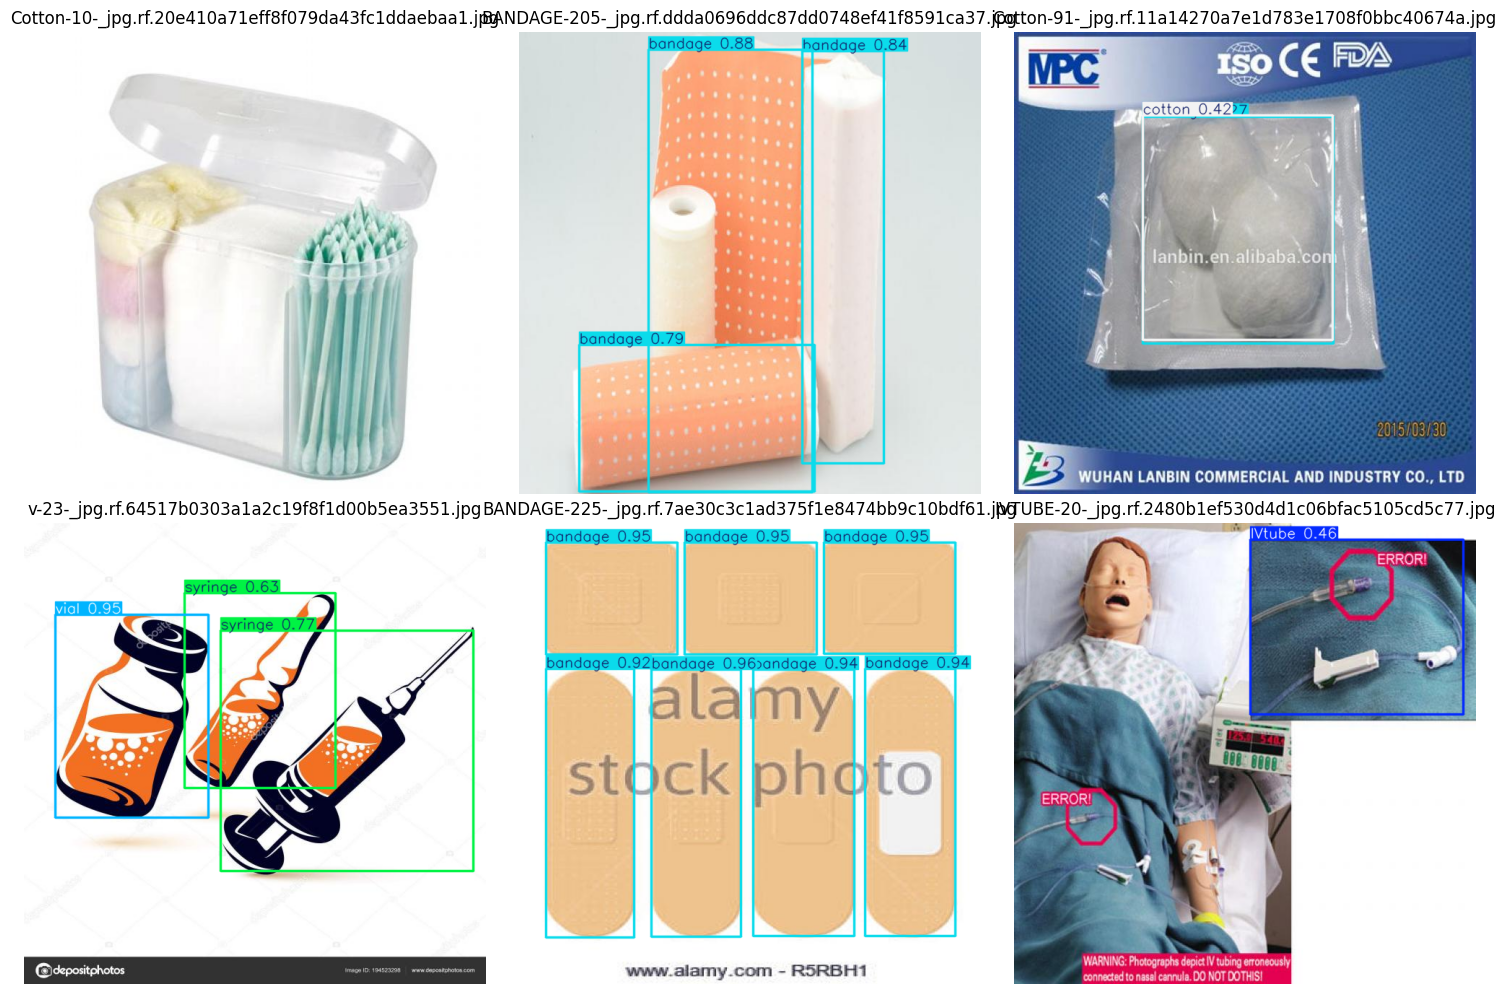

Processed Images:
/content/drive/MyDrive/Colab Notebooks/Dataset/images/test/Cotton-10-_jpg.rf.20e410a71eff8f079da43fc1ddaebaa1.jpg
/content/drive/MyDrive/Colab Notebooks/Dataset/images/test/BANDAGE-205-_jpg.rf.ddda0696ddc87dd0748ef41f8591ca37.jpg
/content/drive/MyDrive/Colab Notebooks/Dataset/images/test/Cotton-91-_jpg.rf.11a14270a7e1d783e1708f0bbc40674a.jpg
/content/drive/MyDrive/Colab Notebooks/Dataset/images/test/v-23-_jpg.rf.64517b0303a1a2c19f8f1d00b5ea3551.jpg
/content/drive/MyDrive/Colab Notebooks/Dataset/images/test/BANDAGE-225-_jpg.rf.7ae30c3c1ad375f1e8474bb9c10bdf61.jpg
/content/drive/MyDrive/Colab Notebooks/Dataset/images/test/IVTUBE-20-_jpg.rf.2480b1ef530d4d1c06bfac5105cd5c77.jpg


In [20]:
import os
import random
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the YOLO model
model_path = "/content/runs/detect/yolov8_medical_waste/weights/best.pt"
model = YOLO(model_path)

# Define the dataset directory
image_dir = "/content/drive/MyDrive/Colab Notebooks/Dataset/images/test"

# Get a list of all image files in the dataset directory
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select 6 random images
random_images = random.sample(image_files, 6)

# Set up the plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns

# Loop through each selected image and perform inference
for ax, img_path in zip(axes.flatten(), random_images):
    results = model(img_path)  # Run inference
    im_array = results[0].plot()[:, :, ::-1]  # Convert BGR to RGB

    ax.imshow(im_array)
    ax.axis("off")  # Hide axes
    ax.set_title(os.path.basename(img_path))  # Show filename as title

# Display the images
plt.tight_layout()
plt.show()

# Print the selected image paths (optional)
print("Processed Images:")
for img in random_images:
    print(img)


In [15]:
import shutil
from google.colab import files

#compress the entire runs folder
shutil.make_archive('runs_backup', 'zip', 'runs')

#download the zip file
files.download('runs_backup.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
shutil.copytree('runs', "/content/drive/MyDrive/runs_backup")

'/content/drive/MyDrive/runs_backup'